<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 124.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract stock data (e.g., historical data)
tesla_data = tesla.history(period="1mo")  # Data for the last month

# Print the stock data
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2025-02-18 00:00:00-05:00  355.010010  359.100006  350.019989  354.109985   
2025-02-19 00:00:00-05:00  354.000000  367.339996  353.670013  360.559998   
2025-02-20 00:00:00-05:00  361.510010  362.299988  348.000000  354.399994   
2025-02-21 00:00:00-05:00  353.440002  354.980011  334.420013  337.799988   
2025-02-24 00:00:00-05:00  338.140015  342.399994  324.700012  330.529999   
2025-02-25 00:00:00-05:00  327.019989  328.890015  297.250000  302.799988   
2025-02-26 00:00:00-05:00  303.709991  309.000000  288.040009  290.799988   
2025-02-27 00:00:00-05:00  291.160004  297.230011  280.880005  281.950012   
2025-02-28 00:00:00-05:00  279.500000  293.880005  273.600006  292.980011   
2025-03-03 00:00:00-05:00  300.339996  303.940002  277.299988  284.649994   
2025-03-04 00:00:00-05:00  270.929993  284.350006  261.839996  272.040009   

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [8]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract stock data for the maximum available time
tesla_data = tesla.history(period="max")

# Print the extracted data
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-03-12 00:00:00-04:00  247.220001  251.839996  241.100006  248.089996   
2025-03-13 00:00:00-04:00  248.130005  248.289993  232.600006  240.679993   
2025-03-14 00:00:00-04:00  247.309998  251.580002  240.729996  249.979996   
2025-03-17 00:00:00-04:00  245.059998  245.399994  232.800003  238.009995   
2025-03-18 00:00:00-04:00  228.190002  230.100006  222.279999  228.460007   

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract stock data for the maximum available time
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Print the first 500 characters of the html_data to verify
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [12]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [14]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Parse the html_data using BeautifulSoup and html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Find the relevant table containing the Tesla Quarterly Revenue
table = soup.find_all("tbody")[1]  # The second table in the HTML

# Create an empty DataFrame to store the extracted data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through the rows in the table body
for row in table.find_all("tr"):
    # Extract data from each row
    cols = row.find_all("td")
    if len(cols) > 1:  # Ensure that the row has the necessary columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        # Append data to the DataFrame using pd.concat
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Print the first 5 rows of the DataFrame to verify the result
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [19]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [20]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Parse the html_data using BeautifulSoup and html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Find the relevant table containing the Tesla Quarterly Revenue
table = soup.find_all("tbody")[1]  # The second table in the HTML

# Create an empty DataFrame to store the extracted data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through the rows in the table body
for row in table.find_all("tr"):
    # Extract data from each row
    cols = row.find_all("td")
    if len(cols) > 1:  # Ensure that the row has the necessary columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        # Append data to the DataFrame using pd.concat
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean the 'Revenue' column by removing commas and dollar signs
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Remove any rows where 'Revenue' is an empty string or non-numeric
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].str.isnumeric()]

# Convert the 'Revenue' column to float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

# Remove null values from the 'Revenue' column
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].notna()]

# Display the last 5 rows of the DataFrame to verify the result
print(tesla_revenue.tail())

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [23]:
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol "GME"
gme_ticker = yf.Ticker("GME")

# Display the ticker object to verify the data
print(gme_ticker.info)

{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [24]:
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol "GME"
gme_ticker = yf.Ticker("GME")

# Extract stock data for the maximum period using the 'history' function
gme_data = gme_ticker.history(period="max")

# Display the first 5 rows of the gme_data dataframe
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [25]:
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol "GME"
gme_ticker = yf.Ticker("GME")

# Extract stock data for the maximum period using the 'history' function
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows of the gme_data DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [26]:
import requests

# URL of the webpage to download
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to download the webpage
response_2 = requests.get(url_2)

# Save the text of the response as a variable named html_data_2
html_data_2 = response_2.text

# Display the first 500 characters of html_data_2 to verify the content
print(html_data_2[:500])  # Show the first 500 characters of the HTML content

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [27]:
from bs4 import BeautifulSoup

# Use BeautifulSoup to parse the HTML data using 'html.parser' or 'html5lib'
soup = BeautifulSoup(html_data_2, "html.parser")

# Print the first 500 characters of the parsed HTML to verify
print(soup.prettify()[:500])  # Pretty print the parsed HTML and show the first 500 characters

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [28]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Find all the tables in the parsed HTML
tables = soup.find_all("table")

# Assuming the table containing the revenue is the first or second table
# Let's use the second table (index 1)
revenue_table = tables[1]

# Extract the rows from the table
rows = revenue_table.find_all("tr")

# Create an empty list to store the data
data = []

# Iterate through the rows, extracting the relevant data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) > 1:  # Ensure there are enough columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        # Remove dollar sign and commas from the revenue value
        revenue = revenue.replace('$', '').replace(',', '')

        # Append the data to the list
        data.append([date, revenue])

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Convert the Revenue column to a numeric type
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Display the first few rows of the DataFrame
print(gme_revenue.head())


         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [29]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage containing the revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup and the html.parser
soup = BeautifulSoup(html_data_2, "html.parser")

# Isolate the relevant table (second table in this case)
table = soup.find_all("tbody")[1]  # The second <tbody> in the HTML

# Create an empty DataFrame to store the extracted data
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through the rows in the table
for row in table.find_all("tr"):
    cols = row.find_all("td")
    
    if len(cols) > 1:  # Ensure the row has the necessary columns
        date = cols[0].text.strip()  # First column is Date
        revenue = cols[1].text.strip()  # Second column is Revenue
        
        # Remove dollar sign and commas from the Revenue column
        revenue = revenue.replace('$', '').replace(',', '')

        # Append the data to the DataFrame
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Convert the Revenue column to numeric, forcing errors to NaN
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Display the first 5 rows of the DataFrame to verify the result
print(gme_revenue.head())

         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [30]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage containing the revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup and the html.parser
soup = BeautifulSoup(html_data_2, "html.parser")

# Isolate the relevant table (second table in this case)
table = soup.find_all("tbody")[1]  # The second <tbody> in the HTML

# Create an empty DataFrame to store the extracted data
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through the rows in the table
for row in table.find_all("tr"):
    cols = row.find_all("td")
    
    if len(cols) > 1:  # Ensure the row has the necessary columns
        date = cols[0].text.strip()  # First column is Date
        revenue = cols[1].text.strip()  # Second column is Revenue
        
        # Remove dollar sign and commas from the Revenue column
        revenue = revenue.replace('$', '').replace(',', '')

        # Append the data to the DataFrame
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Convert the Revenue column to numeric, forcing errors to NaN
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Display the last 5 rows of the DataFrame
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


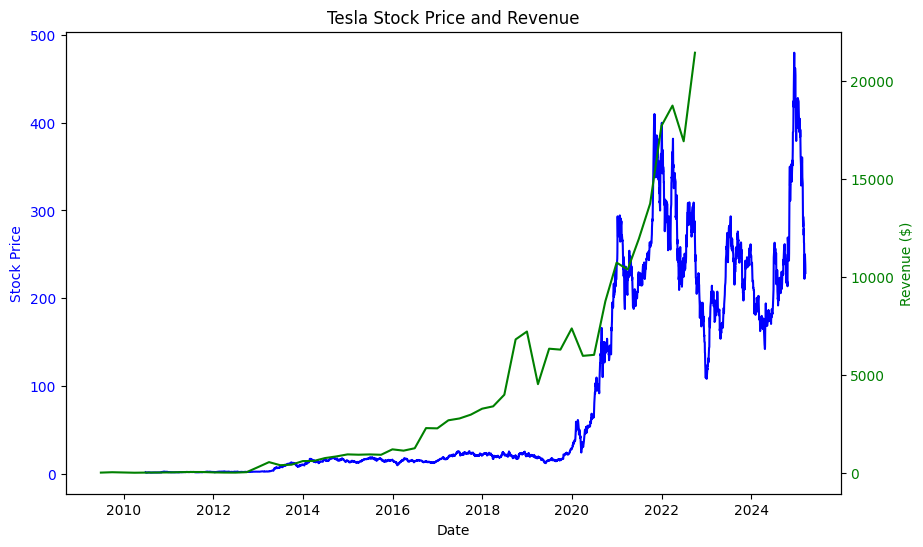

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Assuming tesla_data and tesla_revenue are already defined as per previous steps

def make_graph(stock_data, revenue_data, stock_name):
    # Convert the 'Date' columns to datetime if they are not in datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce')

    # Remove timezone information from Date columns if present
    stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)
    revenue_data['Date'] = revenue_data['Date'].dt.tz_localize(None)

    # Create a figure for the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the Tesla stock price (Close price) on the left y-axis
    ax1.plot(stock_data['Date'], stock_data['Close'], color='b', label=f'{stock_name} Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_title(f'{stock_name} Stock Price and Revenue')

    # Create a second y-axis for plotting the revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='g', label='Revenue')
    ax2.set_ylabel('Revenue ($)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Show the graph
    plt.show()

# Call the function to plot Tesla's data with the revenue data
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


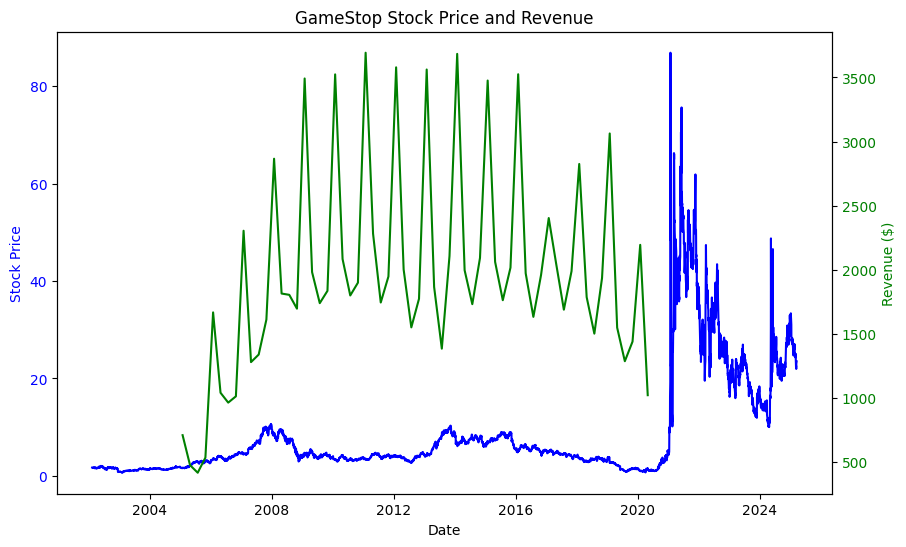

In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Assuming gme_data and gme_revenue are already defined as per previous steps

def make_graph(stock_data, revenue_data, stock_name):
    # Convert the 'Date' columns to datetime if they are not in datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce')

    # Remove timezone information from Date columns if present
    stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)
    revenue_data['Date'] = revenue_data['Date'].dt.tz_localize(None)

    # Create a figure for the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the GameStop stock price (Close price) on the left y-axis
    ax1.plot(stock_data['Date'], stock_data['Close'], color='b', label=f'{stock_name} Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_title(f'{stock_name} Stock Price and Revenue')

    # Create a second y-axis for plotting the revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='g', label='Revenue')
    ax2.set_ylabel('Revenue ($)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Show the graph
    plt.show()

# Call the function to plot GameStop's data with the revenue data
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
